### **BAGGING**

In [1]:
# Library for reading in data and using dataframes
import pandas as pd
# Using numpy arrays
import numpy as np
# Data preprocessing functions like LabelEncoder
from sklearn import preprocessing
%matplotlib inline
# Visualizations
import matplotlib.pyplot as plt
# Model accuracy
from sklearn import metrics
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Give loops a progress bar
from tqdm import tqdm

In [2]:
# This function calculates the train and test accuracy of a model

def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [3]:
# This function creates visualizations of decision trees

# Plot tree helper libraries
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree


def plot_tree(model,filename = "tree.png"):
    #global churn_df 

    dot_data = StringIO()
  

    featureNames = [colunm  for colunm in churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].columns]
    out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= ['left','stay'], filled=True,  special_characters=True,rotate=False)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img,interpolation='nearest')

In [4]:
# This function creates a graph of training accuracy vs how many estimators (Decision Trees) a BaggingClassifier uses

def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators'):
    #Iterate through different number of estimators and average out the results  


    N_estimators=[n for n in range(1,70)]
    times=20
    train_acc=np.zeros((times,len(N_estimators)))
    test_acc=np.zeros((times,len(N_estimators)))
    
    train_time=np.zeros((times,len(N_estimators)))
    test_time=np.zeros((times,len(N_estimators)))
     #average out the results
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            #Iterate through different number of estimators and average out the results   
        
            Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 10),n_estimators=n_estimators,bootstrap=True,random_state=0)
            Bag.fit(X_train,y_train)
          
            
             
            Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  Bag)
           
            
            
  
            train_acc[n,n_estimators-1]=Accuracy['train Accuracy']
            test_acc[n,n_estimators-1]=Accuracy['test Accuracy']
        
        
        
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(train_acc.mean(axis=0))
    ax2.plot(test_acc.mean(axis=0),c='r')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Training accuracy',color='b')
    ax2.set_ylabel('Testing accuracy', color='r')
    plt.title(title)
    plt.show()

In [7]:
# This data set provides information to help you predict what behavior will help you to retain customers. 
# You can analyze all relevant customer data and develop focused customer retention programs.


%pip install requests

import requests
from io import StringIO

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
response = requests.get(url, verify=False)
churn_df = pd.read_csv(StringIO(response.text))

churn_df.head()


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [8]:
# Let's select some features for the modeling. Also, we change the target data type to be an integer, 
# as it is a requirement by the skitlearn algorithm:

churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [9]:
# How many rows and columns are in this dataset in total? 
# What are the names of columns?

print(churn_df.shape)
print(churn_df.columns)

(200, 10)
Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')


Bootstrap Sampling is a method that involves drawing of sample data repeatedly with replacement from a data source to estimate a model parameter. Scikit-learn has methods for Bagging but its helpful to understand Bootstrap sampling. We will import <code>resample</code>

In [10]:
from sklearn.utils import resample

In [11]:
# Consider the five rows of data:

churn_df[0:5]

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [12]:
# perform a bootstrap sample using the function resample;
# see the dataset is the same size, but some rows are repeated

resample(churn_df[0:5])

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1


In [13]:
# repeat the process randomly drawing several other rows

resample(churn_df[0:5])

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1


In [14]:
# define X, and y for our dataset

X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

X.head()

,tenure,age,address,income,ed,employ,equip
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


In [15]:
y = churn_df['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [16]:
# split our dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (140, 7) (140,)
Test set (60, 7) (60,)


<h2 id="modeling">Decision  Tree Classifier  with Scikit-learn</h2>

A Decision  tree Classifier classifies a sample by learning simple decision rules inferred from the data. One problem with Decision  Tree Classifiers is overfitting; they do well with the training data, but they do not Generalize well. Trees have low bias and high variance; as such, they are a prime candidate for Bagging. Instability is another term used to describe models that overfit. Instability is characterized by a slight change in the training set that causes a drastic change in the model.  Let's show that Decision tree Classifiers are unstable.

In [17]:
# load the DecisionTreeClassifier modle in sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [18]:
# create and train a tree with a max depth of 5

max_depth=5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=10)
Tree
Tree.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
# predict using our test set

yhat = Tree.predict(X_test)
yhat

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [20]:
# see the test error is much larger than the training error

get_accuracy(X_train, X_test, y_train, y_test,  Tree)

{'test Accuracy': 0.6166666666666667, 'train Accuracy': 0.9071428571428571}

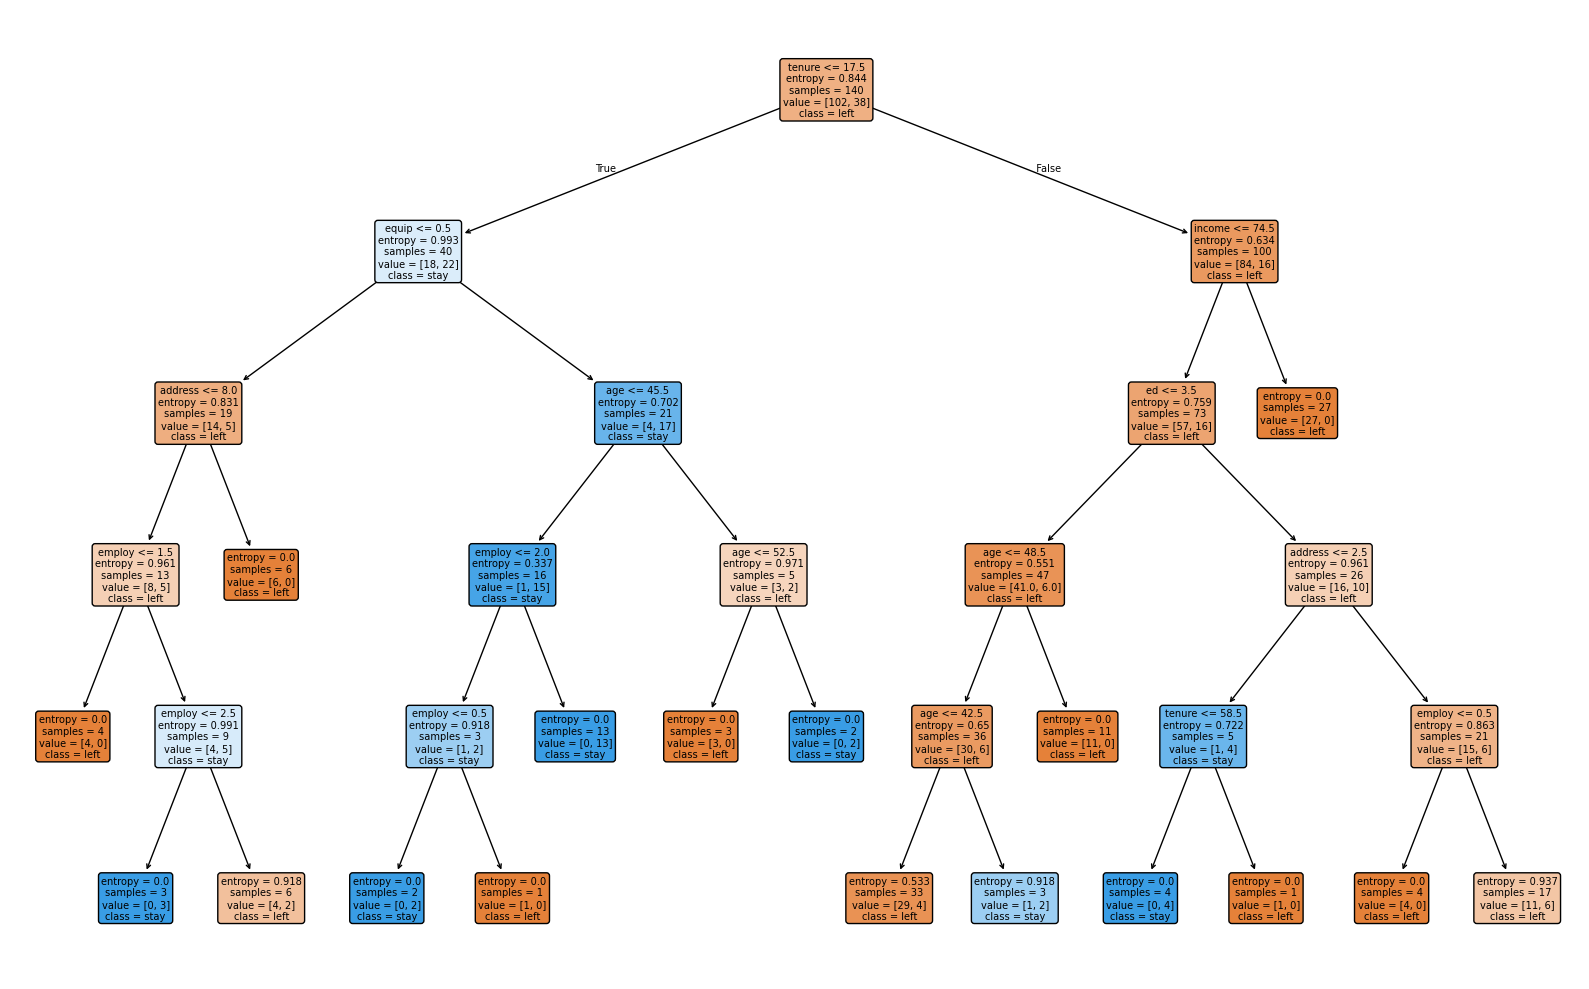

In [29]:
# plot the nodes of the tree

import matplotlib.pyplot as plt
from sklearn import tree

featureNames = X_train.columns

plt.figure(figsize=(16, 10))
tree.plot_tree(
    Tree,
    feature_names=featureNames,
    class_names=['left','stay'],
    filled=True,
    rounded=True
)
plt.tight_layout()
plt.show()   # << show in notebook/REPL

repeat the process but sampling different data points from the same dataset. We see the tree still suffers from overfitting; in addition, the new tree is entirely different.

Train Accuracy: 1.000
Test Accuracy : 0.617


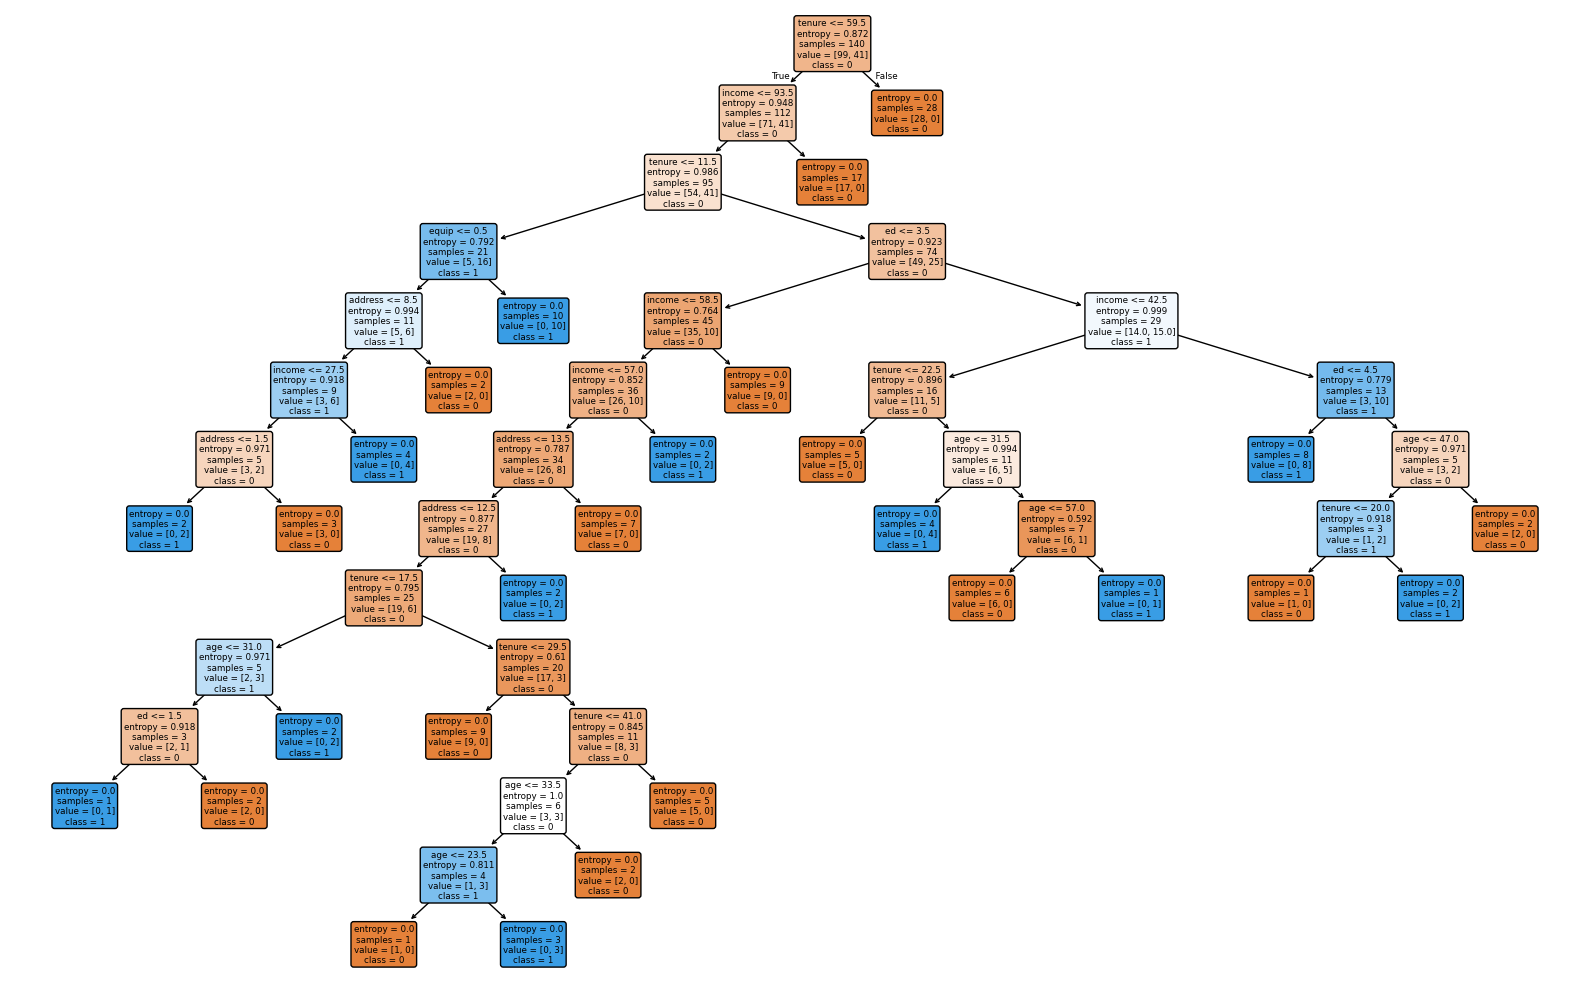

In [33]:
# 1) Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree as sk_plot_tree
from sklearn.metrics import accuracy_score

# 2) Split your dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5, stratify=y
)

# 3) Create and train the Decision Tree
max_depth = None  # or set a value like 4, 5, etc.
Tree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=8)
Tree.fit(X_train, y_train)

# 4) Evaluate performance
y_pred_train = Tree.predict(X_train)
y_pred_test = Tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy : {test_accuracy:.3f}")

# 5) Plot and save the decision tree
featureNames = getattr(X_train, "columns", [f"f{i}" for i in range(X_train.shape[1])])
class_names = [str(c) for c in np.unique(y_train)]

plt.figure(figsize=(16, 10))
sk_plot_tree(
    Tree,
    feature_names=featureNames,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.tight_layout()
plt.savefig("tree1.png", dpi=300)
plt.show()

<h2 id="evaluation">Bagging  for classification with  Scikit-learn</h2>


A Bagging classifier is an ensemble model that trains  base classifiers  on random subsets   of the original dataset  (Bootstrap Sampling by default), and then aggregate their individual predictions by voting. import the module:

In [34]:
from sklearn.ensemble import BaggingClassifier

Bagging improves models that suffer from overfitting; they do well on the training data, but they do not Generalize well. Decision Trees are a prime candidate for this reason, in addition, they are fast to train; We create a <code>BaggingClassifier</code> object,  with a Decision Tree as the <code>base_estimator</code>

In [36]:
Bag = BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=2), n_estimators=30, random_state=0, bootstrap=True)

In [37]:
# fit the model

Bag.fit(X_train,y_train)

,estimator,DecisionTreeC...andom_state=2)
,n_estimators,30
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,0
,verbose,0


In [38]:
Bag.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [45]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

0.7


In [47]:
def get_accuracy_bag(X, y, label, n_list=(5, 10, 20, 30, 50)):
    print(f"Running Bagging Classifier for {label}...\n")

    # 1) One split so results are comparable across n
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    train_accs, test_accs = [], []

    for n in n_list:
        Bag = BaggingClassifier(
            estimator=DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=2),
            n_estimators=n,
            bootstrap=True,
            random_state=0
        )
        Bag.fit(X_train, y_train)

        # Train/Test accuracy (uses your existing helper for test)
        train_acc = (Bag.predict(X_train) == y_train).mean()
        test_acc  = get_accuracy(X_train, X_test, y_train, y_test, Bag)

        train_accs.append(train_acc)
        test_accs.append(test_acc)
        print(f"n_estimators={n:2d} → Train={train_acc:.3f}, Test={test_acc:.3f}")

    # 2) Diagram
    plt.figure(figsize=(8, 5))
    plt.plot(n_list, train_accs, marker='o', label='Train Accuracy')
    plt.plot(n_list, test_accs,  marker='s', label='Test Accuracy')
    plt.title(f'Bagging Accuracy vs. Number of Estimators — {label}')
    plt.xlabel('n_estimators'); plt.ylabel('Accuracy')
    plt.xticks(n_list)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3) Return raw results if you want to reuse them
    return list(zip(n_list, train_accs, test_accs))

Running Bagging Classifier for Customer Churn...

n_estimators= 5 → Train=0.893, Test=0.767
n_estimators=10 → Train=0.886, Test=0.767
n_estimators=20 → Train=0.914, Test=0.800
n_estimators=30 → Train=0.907, Test=0.783
n_estimators=50 → Train=0.921, Test=0.800


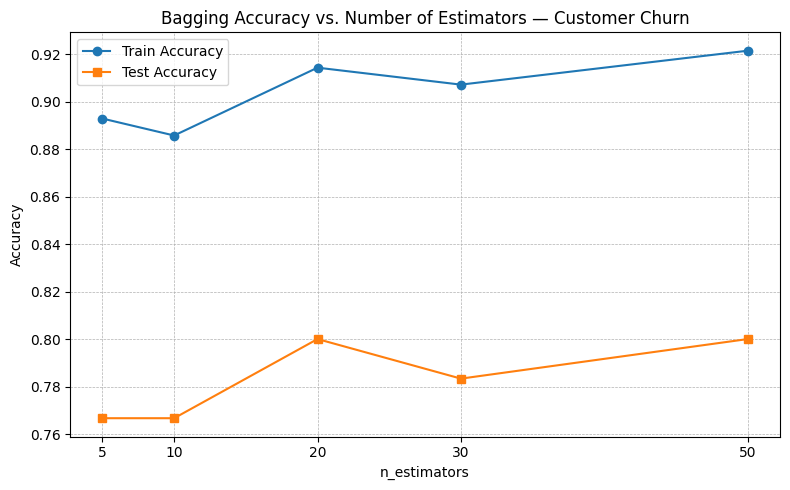

[(5, np.float64(0.8928571428571429), 0.7666666666666667),
 (10, np.float64(0.8857142857142857), 0.7666666666666667),
 (20, np.float64(0.9142857142857143), 0.8),
 (30, np.float64(0.9071428571428571), 0.7833333333333333),
 (50, np.float64(0.9214285714285714), 0.8)]

In [48]:
get_accuracy_bag(X, y, "Customer Churn")

## Low Variance Example

Bagging does not improve result if the model has low Variance i.e. does reasonably well on the test and training data. Consider the SVM; the accuracy on the tests data and training data are similar

In [50]:
from sklearn.svm import SVC

clf=SVC(kernel='linear',gamma='scale')
clf.fit(X_train, y_train) 
print(get_accuracy(X_train, X_test, y_train, y_test,  clf))

0.7


In [52]:
# Bagging the SVM does almost nothing

Bag = BaggingClassifier(estimator=SVC(kernel='linear', gamma='scale'), n_estimators=10, random_state=0, bootstrap=True)
Bag.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test, Bag))

0.6666666666666666


<h2 id="practice">Practice: Cancer data</h2>

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

<br>
<br>

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")

df.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [69]:
# remove rows that have a ? in the BareNuc column

df = df[df["BareNuc"] != "?"]

In [70]:
# Lets define the X and y for our dataset

X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [71]:
y = df['Class']

y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [72]:
# split our data into training and testing data with a 80/20 split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [73]:
# determine the best parameters for n_estimators and the max_depth of the base_estimator 
# we will use GridSearchCV

from sklearn.model_selection import GridSearchCV

use GridSearch for Exhaustive search over specified parameter values. To alter the base model; we add the double underscore and the attribute value:

Here we are searching odd numbers from 1 to 39 for n_estimators and odd numbers from 1 to 20 for max_depth in the base_estimator

In [74]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'base_estimator__max_depth' : [2*n+1 for n in range(10) ] }

Create a BaggingClassifier object called Bag with the base_estimator set to a DecisionTreeClassifier object where random_state = 0 and bootstrap = True

In [75]:
Bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0, bootstrap=True)

In [76]:
# create a GridSearchCV object and search for the best parameters according to our parameter_grid

search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='accuracy', cv=3)

In [ ]:
param_grid = {
    'n_estimators': [2*n+1 for n in range(20)],
    'estimator__max_depth': [2*n+1 for n in range(10)]  
}

search = GridSearchCV(
    estimator=Bag,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3
)

search.fit(X_train.astype(float), y_train)  

print("Best parameters:", search.best_params_)
print("Best CV accuracy:", search.best_score_)
print("Test accuracy:", search.best_estimator_.score(X_test.astype(float), y_test))

Best parameters: {'estimator__max_depth': 5, 'n_estimators': 11}
Best CV accuracy: 0.9688644688644689
Test accuracy: 0.9708029197080292


In [82]:
# see the best accuracy score of the searched parameters was ~97%

search.best_score_

np.float64(0.9688644688644689)

In [83]:
# see the parameters that resulted in the best score

search.best_params_

{'estimator__max_depth': 5, 'n_estimators': 11}

In [84]:
# see the testing and training accuracy of the best estimator

print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

0.9708029197080292


Running Bagging Classifier for Cancer Data...

n_estimators= 5 → Train=0.983, Test=0.951
n_estimators=10 → Train=0.987, Test=0.956
n_estimators=20 → Train=0.990, Test=0.956
n_estimators=30 → Train=0.992, Test=0.966
n_estimators=50 → Train=0.992, Test=0.961


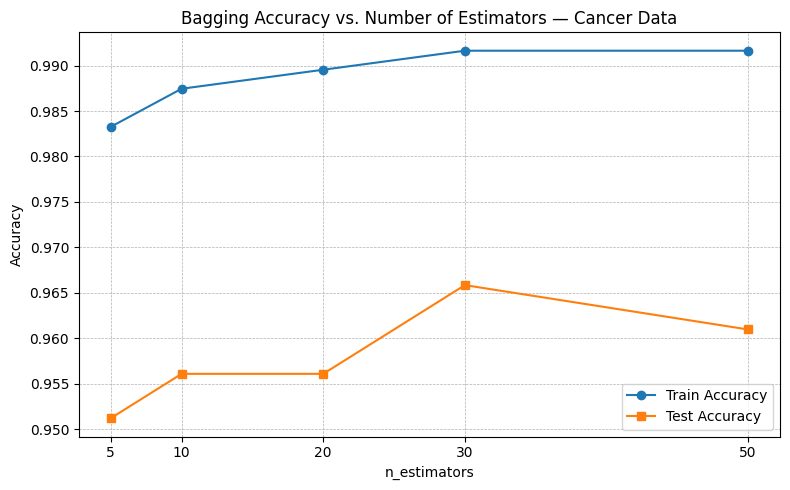

[(5, np.float64(0.9832635983263598), 0.9512195121951219),
 (10, np.float64(0.9874476987447699), 0.9560975609756097),
 (20, np.float64(0.9895397489539749), 0.9560975609756097),
 (30, np.float64(0.9916317991631799), 0.9658536585365853),
 (50, np.float64(0.9916317991631799), 0.9609756097560975)]

In [85]:
get_accuracy_bag(X, y, "Cancer Data")

<h2 id="practice">Practice: During their course of treatment</h2>

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

In [98]:
import requests
from io import StringIO

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
response = requests.get(url, verify=False)
df = pd.read_csv(StringIO(response.text), delimiter=",")
df.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [99]:
# create the X and y for the dataset

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [100]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [101]:
# use a LabelEncoder to turn categorical features into numerical

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

In [102]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [103]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

In [104]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [105]:
# the data into training and testing data with a 80/20 split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


In [106]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'base_estimator__max_depth' : [2*n+1 for n in range(10) ]}

In [109]:
Bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0, bootstrap=True)

In [110]:
# Create GridSearchCV object called search with the estimator set to Bag, param_grid set to param_grid, scoring set to accuracy, and cv set to 3.

search = GridSearchCV(estimator=Bag, param_grid=param_grid,scoring='accuracy', cv=3)

In [113]:
# Update param_grid to use 'estimator__max_depth' instead of 'base_estimator__max_depth'
param_grid = {
	'n_estimators': [2*n+1 for n in range(20)],
	'estimator__max_depth': [2*n+1 for n in range(10)]
}

search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='accuracy', cv=3)
search.fit(X_train, y_train)

,estimator,BaggingClassi...andom_state=0)
,param_grid,"{'estimator__max_depth': [1, 3, ...], 'n_estimators': [1, 3, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [114]:
search.best_score_

np.float64(1.0)

In [115]:
search.best_params_

{'estimator__max_depth': 5, 'n_estimators': 9}

In [116]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

0.95


Running Bagging Classifier for Drug Data...

n_estimators= 5 → Train=1.000, Test=0.983
n_estimators=10 → Train=1.000, Test=0.983
n_estimators=20 → Train=1.000, Test=0.983
n_estimators=30 → Train=1.000, Test=0.983
n_estimators=50 → Train=1.000, Test=0.983


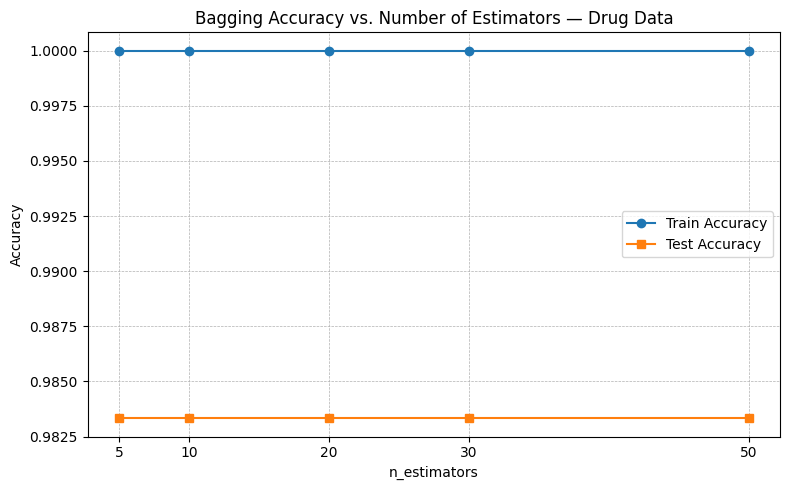

[(5, np.float64(1.0), 0.9833333333333333),
 (10, np.float64(1.0), 0.9833333333333333),
 (20, np.float64(1.0), 0.9833333333333333),
 (30, np.float64(1.0), 0.9833333333333333),
 (50, np.float64(1.0), 0.9833333333333333)]

In [117]:
get_accuracy_bag(X, y, "Drug Data")  